<a href="https://colab.research.google.com/github/ialbornoz2016/CAP4613/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample of the training images
Sample of the test images
Samples of the validation images
Plotting the features of 500 training images: 



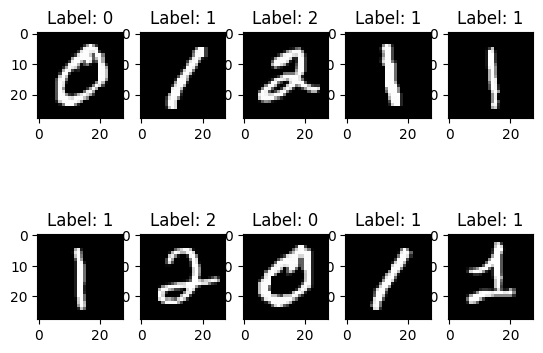

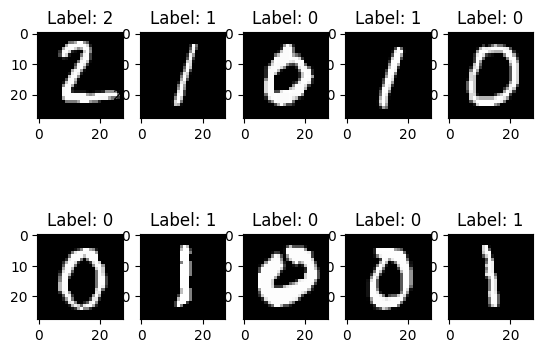

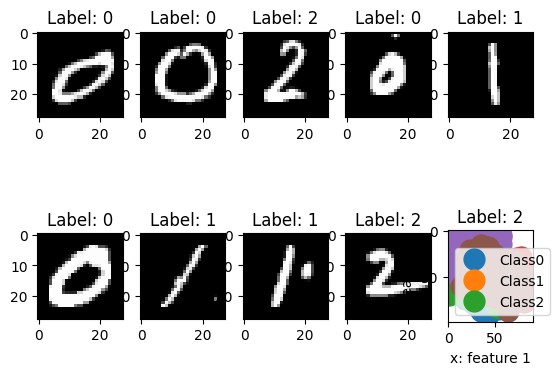

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
  plt.figure()
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:], cmap='gray')
    plt.title('Label: ' + str(labels[i-1]))
  plt.show

def feat_extract(images):
   width = images.shape[1]
   height = images.shape[2]
   features = np.zeros((images.shape[0], 4))
   features_temp = np.sum(images[:,0:int(width/2),0:int(height/2)], axis=2)  #quad 0
   features[:,0]=np.sum(features_temp,axis=1)/(width*height/4)
   features_temp = np.sum(images[:,0:int(width/2),int(height/2):], axis=2) #quad 1
   features[:,1]=np.sum(features_temp,axis=1)/(width*height/4)
   features_temp = np.sum(images[:,int(width/2):,0:int(height/2)], axis=2)  #quad 3
   features[:,2]=np.sum(features_temp,axis=1)/(width*height/4)
   features_temp = np.sum(images[:,int(width/2):,int(height/2):], axis=2)  #quad 4
   features[:,3]=np.sum(features_temp,axis=1)/(width*height/4)
   return features

def feat_plot(features,labels,classes):
  for class_i in classes:
    plt.plot(features[labels[:]==classes[class_i],0],
             features[labels[:]==classes[class_i],1], 'o', markersize=15)
    #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[class_i]) for class_i in classes])
    plt.show

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = mnist.load_data()

classes = [0,1,2]
x_train_012=x_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2)),0:28,0:28]
y_train_012=y_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2))]
print('Sample of the training images')
img_plt(x_train_012[0:10,:,:],y_train_012[0:10])

x_test_012=x_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2)),0:28,0:28]
y_test_012=y_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2))]
print('Sample of the test images')
img_plt(x_test_012[0:10,:,:], y_test_012[0:10])

#Selecting 500 images from training data as Validation data
#Shuffling training data
num_train_img=x_train_012.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train_012=x_train_012[train_ind_s,:,:]
y_train_012=y_train_012[train_ind_s]
#Selecting 500 img for Validation
x_val_012=x_train_012[0:500,:,:]
y_val_012=y_train_012[0:500]
#Rest of training set
x_train_012=x_train_012[500:,:,:]
y_train_012=y_train_012[500:]
print('Samples of the validation images')
img_plt(x_val_012[0:10,:,:],y_val_012[0:10])

#Calculating training, validation, testing feature (avg of 4 quadrants grid)

feature_train=feat_extract(x_train_012)
feature_val=feat_extract(x_val_012)
feature_test=feat_extract(x_test_012)

print('Plotting the features of 500 training images: ')
feat_plot(feature_train[1:500, 0:2],y_train_012[1:500], classes)
feat_plot(feature_train[1:500, 2:4],y_train_012[1:500], classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 

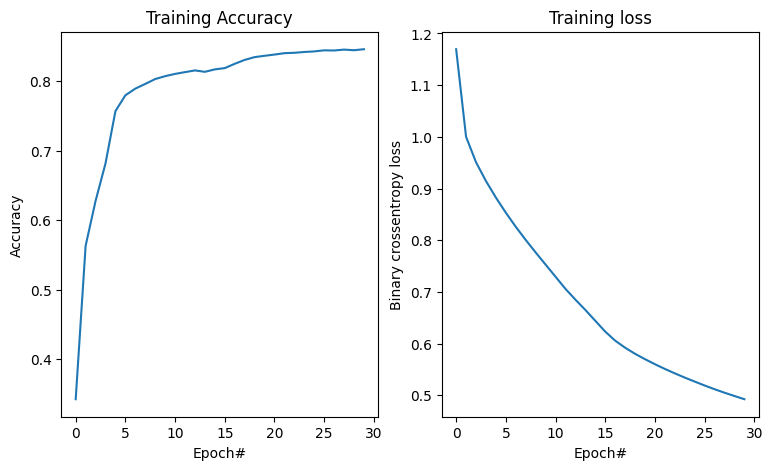

Epoch 1/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.7673 - accuracy: 0.6944
Epoch 2/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.6101 - accuracy: 0.8350
Epoch 3/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.5532 - accuracy: 0.8537
Epoch 4/30
1133/1133 [==============================] - 4s 3ms/step - loss: 0.5142 - accuracy: 0.8595
Epoch 5/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4823 - accuracy: 0.8631
Epoch 6/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.4553 - accuracy: 0.8678
Epoch 7/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.4350 - accuracy: 0.8714
Epoch 8/30
1133/1133 [==============================] - 5s 4ms/step - loss: 0.4212 - accuracy: 0.8739
Epoch 9/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.4107 - accuracy: 0.8750
Epoch 10/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.402

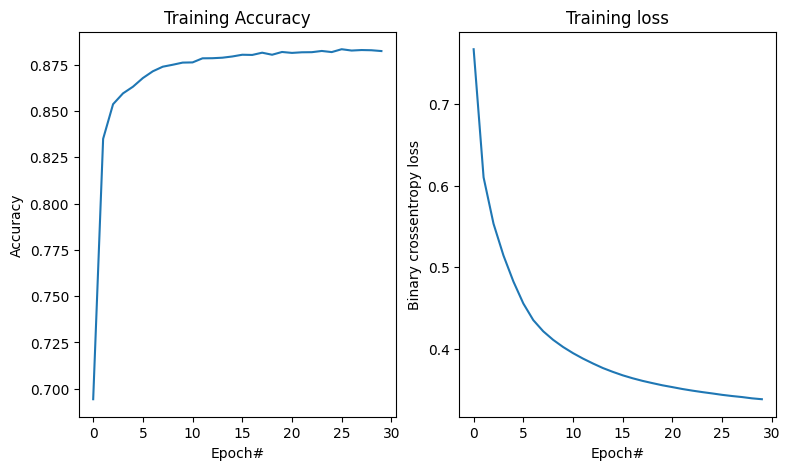

Epoch 1/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.8757 - accuracy: 0.6620
Epoch 2/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.6129 - accuracy: 0.8626
Epoch 3/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.5266 - accuracy: 0.8734
Epoch 4/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4792 - accuracy: 0.8761
Epoch 5/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4491 - accuracy: 0.8783
Epoch 6/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4270 - accuracy: 0.8794
Epoch 7/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.4086 - accuracy: 0.8806
Epoch 8/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.3921 - accuracy: 0.8821
Epoch 9/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.3789 - accuracy: 0.8834
Epoch 10/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.369

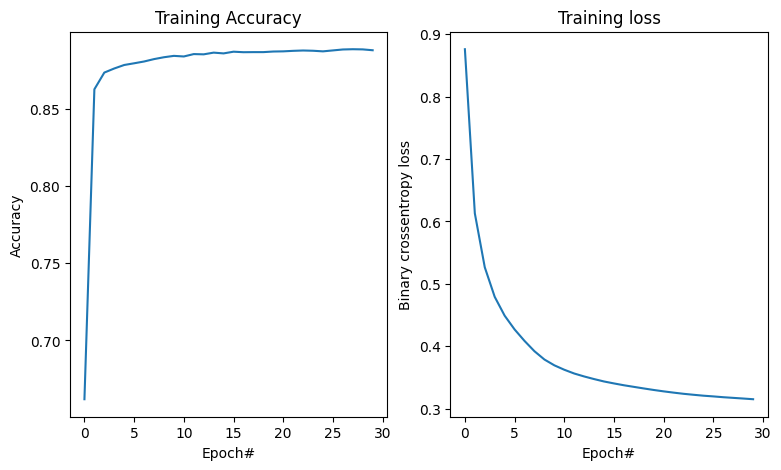

Epoch 1/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.7215 - accuracy: 0.7897
Epoch 2/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.5432 - accuracy: 0.8628
Epoch 3/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.4862 - accuracy: 0.8720
Epoch 4/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4558 - accuracy: 0.8775
Epoch 5/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.8794
Epoch 6/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4168 - accuracy: 0.8802
Epoch 7/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.4013 - accuracy: 0.8809
Epoch 8/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.3886 - accuracy: 0.8814
Epoch 9/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8835
Epoch 10/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.368

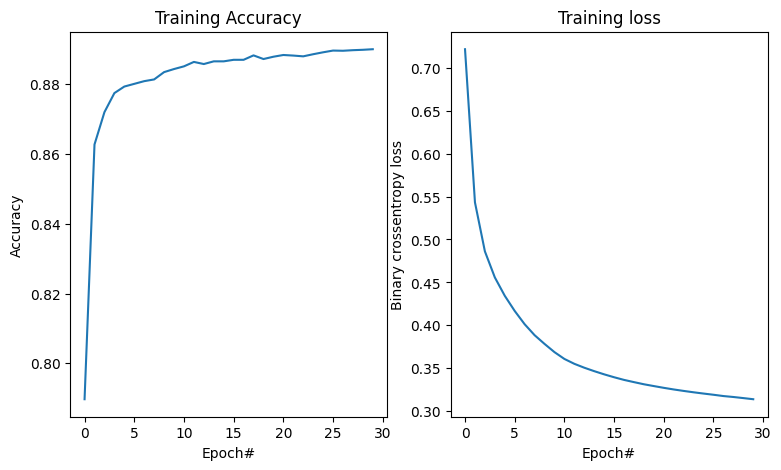

Epoch 1/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.8732 - accuracy: 0.6547
Epoch 2/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.6405 - accuracy: 0.8188
Epoch 3/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.5606 - accuracy: 0.8460
Epoch 4/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.5075 - accuracy: 0.8610
Epoch 5/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.4679 - accuracy: 0.8683
Epoch 6/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8726
Epoch 7/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.4141 - accuracy: 0.8765
Epoch 8/30
1133/1133 [==============================] - 3s 3ms/step - loss: 0.3963 - accuracy: 0.8776
Epoch 9/30
1133/1133 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8792
Epoch 10/30
1133/1133 [==============================] - 2s 2ms/step - loss: 0.371

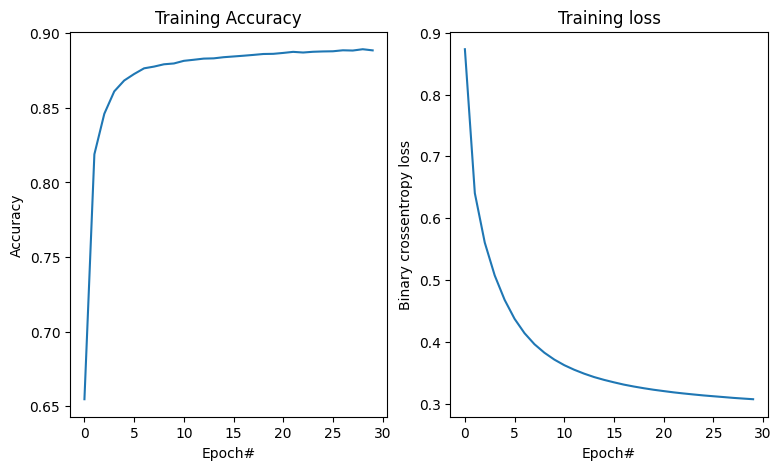

In [3]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1.2.-1.2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')
  plt.show()


#Model 1 - 1 layer 16 nodes
model_a = Sequential()
model_a.add(Dense(input_dim=4, units=16, activation='tanh'))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()

opt= tf.keras.optimizers.SGD(learning_rate=0.0001)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

#Model 2 - 1 layer 64nodes
model_b = Sequential()
model_b.add(Dense(input_dim=4, units=64, activation='tanh'))
model_b.add(Dense(units=len(classes), activation='softmax'))
model_b.summary()

opt= tf.keras.optimizers.SGD(learning_rate=0.0001)
model_b.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

#Model 3 - 1 layer 128node
model_c = Sequential()
model_c.add(Dense(input_dim=4, units=128, activation='tanh'))
model_c.add(Dense(units=len(classes), activation='softmax'))
model_c.summary()

opt= tf.keras.optimizers.SGD(learning_rate=0.0001)
model_c.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])


#Model 4 - 2 layers 128nodes, 16nodes
model_d = Sequential()
model_d.add(Dense(input_dim=4, units=128, activation='tanh'))
model_d.add(Dense(units=16, activation ='tanh'))
model_d.add(Dense(units=len(classes), activation='softmax'))
model_d.summary()

opt= tf.keras.optimizers.SGD(learning_rate=0.0001)
model_d.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

#Model 5 - 2 layers 128nodes, 64 nodes
model_e = Sequential()
model_e.add(Dense(input_dim=4, units=128, activation='tanh'))
model_e.add(Dense(units=64, activation ='tanh'))
model_e.add(Dense(units=len(classes), activation='softmax'))
model_e.summary()

opt= tf.keras.optimizers.SGD(learning_rate=0.0001)
model_e.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])


#convert class vectors to binary class matrices

y_train_012_c= to_categorical(y_train_012, len(classes))
y_val_012_c = to_categorical(y_val_012, len(classes))
y_test_012_c= to_categorical(y_test_012, len(classes))

history=model_a.fit(feature_train, y_train_012_c,
                    batch_size=16,
                    epochs=30,
                    verbose=1)


#Evaluating model 1 on training samples
score= model_a.evaluate(feature_train,y_train_012_c)
print('Total loss on training set 1: ', score[0])
print('Accuracy of training set 1: ', score[1])

#Evaluating model 1 on Validation samples
score=model_a.evaluate(feature_val,y_val_012_c)
print('Total loss on validation set 1: ', score[0])
print("Accuracy of validation set 1: ", score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

history=model_b.fit(feature_train, y_train_012_c,
                    batch_size=16,
                    epochs=30,
                    verbose=1)

#Evaluating model 2 on training samples
score= model_b.evaluate(feature_train,y_train_012_c)
print('Total loss on training set 2: ', score[0])
print('Accuracy of training set 2: ', score[1])

#Evaluating model 2 on Validation samples
score= model_b.evaluate(feature_train,y_train_012_c)
print('Total loss on validation set 2: ', score[0])
print('Accuracy of validation set 2: ', score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)



history=model_c.fit(feature_train, y_train_012_c,
                    batch_size=16,
                    epochs=30,
                    verbose=1)

#Evaluating model 3 on training samples
score= model_c.evaluate(feature_train,y_train_012_c)
print('Total loss on training set 3: ', score[0])
print('Accuracy of training set 3: ', score[1])

#Evaluating model 3 on Validation samples
score= model_c.evaluate(feature_train,y_train_012_c)
print('Total loss on validation set 3: ', score[0])
print('Accuracy of validation set 3: ', score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

history=model_d.fit(feature_train, y_train_012_c,
                    batch_size=16,
                    epochs=30,
                    verbose=1)

#Evaluating model 4 on training samples
score= model_d.evaluate(feature_train,y_train_012_c)
print('Total loss on training set 4: ', score[0])
print('Accuracy of training set 4: ', score[1])

#Evaluating model 4 on Validation samples
score= model_d.evaluate(feature_train,y_train_012_c)
print('Total loss on validation set 4: ', score[0])
print('Accuracy of validation set 4: ', score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

history=model_e.fit(feature_train, y_train_012_c,
                    batch_size=16,
                    epochs=30,
                    verbose=1)

#Evaluating model 5 on training samples
score= model_e.evaluate(feature_train,y_train_012_c)
print('Total loss on training set 5: ', score[0])
print('Accuracy of training set 5: ', score[1])

#Evaluating model 5 on Validation samples
score= model_e.evaluate(feature_train,y_train_012_c)
print('Total loss on validation set 5: ', score[0])
print('Accuracy of validation set 5: ', score[1])

plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

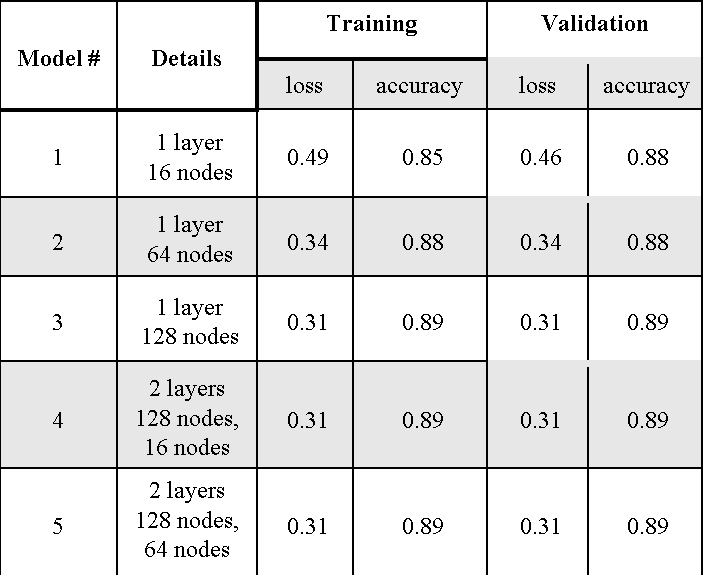

F.) What behavior do you observe in the training loss and the validation loss when you increase the number layers and nodes in the previous table. Which model is more suitable in this problem? Explain.


  I notice that the loss gets smaller while accuracy imporves as the number of layers and nodes expand. Model 4 and Model 5 both seem to be suitable in this problem as the results are basically the same with a 0.31 loss and 0.89 accuracy.

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#Evaluating model 1 on testing samples
score=model_a.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#Predicting the class of the model 1 samples
test_class1_prob=model_a.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab, y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', conf_mat)



#Evaluating model 2 on testing samples
score=model_b.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#Predicting the class of the model 2 samples
test_class1_prob=model_b.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab, y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', conf_mat)



#Evaluating model 3 on testing samples
score=model_c.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#Predicting the class of the model 3 samples
test_class1_prob=model_c.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab, y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', conf_mat)



#Evaluating model 4 on testing samples
score=model_d.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#Predicting the class of the model 4 samples
test_class1_prob=model_d.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab, y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', conf_mat)



#Evaluating model 5 on testing samples
score=model_e.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#Predicting the class of the model 5 samples
test_class1_prob=model_e.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab, y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', conf_mat)

99/99 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8443
Total loss on testing set:  0.4992091655731201
Accuracy of testing set:  0.8442961573600769
99/99 [==============================] - 0s 2ms/step
The accuracy using the testing set:  0.844296155068319
The confusion matrix using testing set: 
 [[881  56 170]
 [ 12 962  48]
 [ 87 117 814]]
99/99 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8745
Total loss on testing set:  0.35314732789993286
Accuracy of testing set:  0.8744836449623108
99/99 [==============================] - 0s 2ms/step
The accuracy using the testing set:  0.8744836352081348
The confusion matrix using testing set: 
 [[ 892   43  177]
 [   7 1051   46]
 [  81   41  809]]
99/99 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8780
Total loss on testing set:  0.3323919475078583
Accuracy of testing set:  0.877979040145874
99/99 [==============================] - 0s 2ms/step
The accu